In [1]:
import random, pylab, numpy

def genNoisyParabolicData(consts, xs, tofile=False, filename="data.csv"):
    """ Generates a set of data given the constants a, b, and c for a parabolic equation.
        consts is a tuple of three flots or integers, xs a list of float or integers."""
    ys = []
    a,b,c = consts
    for x in xs:
        val = a*x**2 + b*x + c
        ys.append(val + random.gauss(0, 35))
    if tofile: # Print to file if required (format: csv)
        f = open(filename, "w")
        for i in range(len(xs)):
            f.write(str(xs[i])+","+str(ys[i])+"\n")
        f.close()
    return ys

def fitData(xs, ys, degree=1):
    xs = pylab.array(xs[:]) * 9.81 # get force
    ys = pylab.array(ys[:])
    
    pylab.figure()
    pylab.plot(xs, ys, 'b*', label="Meausured points")
    
    model = pylab.polyfit(xs, ys, degree)
    estys = pylab.polyval(model, xs)
    a = model[0]
    k = 1/a
    pylab.plot(xs, estys, "c", label="Best Fit, k = " + str(round(k, 5)))
    pylab.legend(loc="best")
    
    # Display
    pylab.show()
    
    # Goodness of Fit and r Squared
    fit = avgMeanSquareError(ys, estys)
    error = rSquared(ys, estys)
    print("Degree", degree, "| Avg Mean Square Error =", fit, "| R2 =", error)
    
def avgMeanSquareError(data, predicted):
    error = 0
    for i in range(len(data)):
        error += (data[i] - predicted[i])**2
    return error/len(data)

def rSquared(observed, predicted):
    error = ((predicted - observed)**2).sum()
    meanError = error/len(observed)
    return 1 -(meanError/numpy.var(observed))

def genModels(xs, ys, degrees):
    models = []
    for d in degrees:
        models.append(pylab.polyfit(xs, ys, d))
    return models

def testFits(xs, ys, models, degrees, title=""):
    pylab.figure()
    pylab.plot(xs, ys, "o", label="Data")
    for i in range(len(models)):
        estys = pylab.polyval(models[i], xs)
        error = rSquared(ys, estys)
        pylab.plot(xs, estys, label="Fit of Degree" + str(degrees[i]) + ", R2 = " + str(round(error, 5)))
        pylab.legend(loc="best")
    pylab.title(title)
    pylab.show()

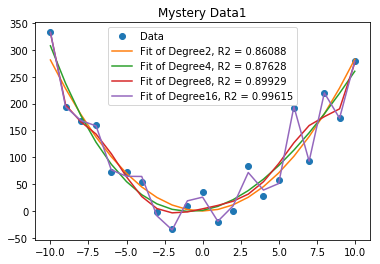

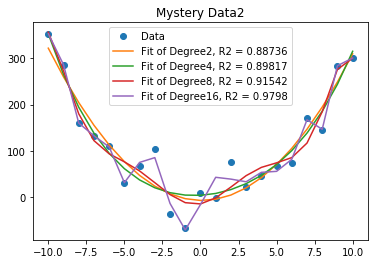

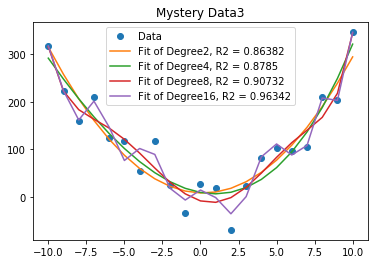

In [2]:
random.seed(0)
for i in range(3):
    xs = range(-10, 11, 1)
    ys = genNoisyParabolicData((3,0,0), xs)
    degrees = [2,4,8,16]
    models = genModels(xs,ys,degrees)
    testFits(xs,ys,models,degrees,"Mystery Data" + str(i+1))

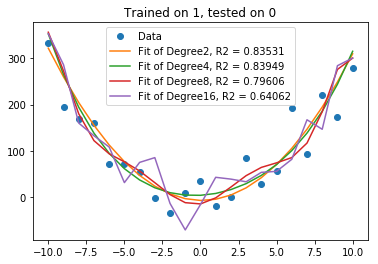

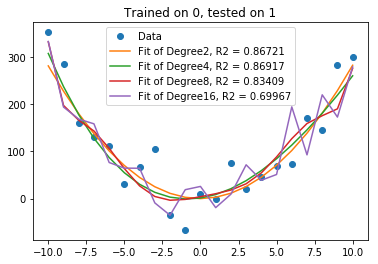

In [39]:
random.seed(0)
xs,ys = [],[]
degrees = [2,4,8,16]

for i in range(2):
    xs.append(range(-10, 11, 1))
    ys.append(genNoisyParabolicData((3,0,0), xs[i]))

models = genModels(xs[1],ys[1],degrees)
testFits(xs[0],ys[0],models,degrees,"Trained on 1, tested on 0")

models = genModels(xs[0],ys[0],degrees)
testFits(xs[1],ys[1],models,degrees,"Trained on 0, tested on 1")

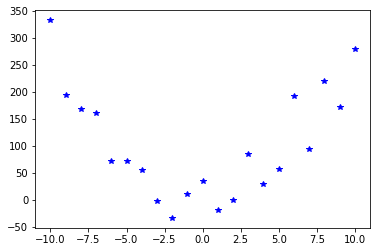

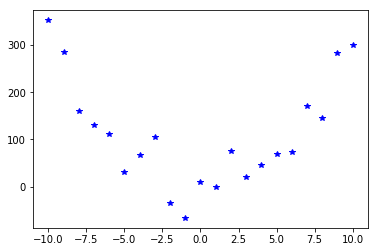

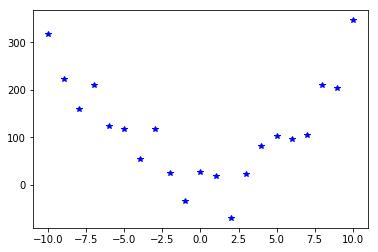

In [17]:
random.seed(0)
for i in range(3):
    xs = range(-10, 11, 1)
    ys = genNoisyParabolicData((3,0,0), xs)
    pylab.plot(xs,ys,"b*")
    pylab.show()